# 웹 데이터 수집

* Last Updated: 20180320TUE0536 20180318SUN2127 20170917

## 1.1 학습내용

### 1.1.1 목표

* 웹 페이지를 수집할 수 있다.
* 웹 페이지를 수집하기 위한 헤더를 설정할 수 있다.
* 웹 페이지를 수집하면 저작권을 위반하는지 설명할 수 있다.

### 1.1.2 목차

* 1.2 인터넷으로 나가기
* 1.2.1 인터넷에 많은 정보가 있다. 
* 1.2.2 웹클라이언트와 서버
* 1.2.3 http
* 1.3 웹데이터 수집
* 1.3.1 웹데이터
* 1.3.2 수집
* 1.3.3 프로그래밍으로 수집
* 1.3.4 웹페이지 주소
* 1.3.5 params
* 1.4 url 가져오기
* 1.4.1 library
* 1.4.2 Requests 라이브러리
* 1.4.3 urllib
* 1.4.2 HTTP errors
* 1.5 http headers
* 1.5.1 HTTP Request(s)
* 1.5.2 HTTP Response(s)

### 1.1.3 문제

* 문제 웹데이터-1: python.org 페이지 가져오기.
* 문제 웹데이터-2: 프로그램 로봇이지만 웹브라우저에서 검색하는 것으로 만들기.
* 문제 웹데이터-3: 포털사이트와 페이스북 사이트에서 데이터 수집이 가능한지 알아보기.
* 문제 웹데이터-4: 로그인이 필요한 페이지를 가져오기
* 문제 웹데이터-5: 크롤링을 해 놓은 오픈 데이터를 사용해 보기

## 1.2 인터넷으로 나가기

### 1.2.1  인터넷에 많은 정보가 있다.

인터넷은 어디에나 있다.
요즘 뉴스를 종이신문에서 읽는 사람이 적어지고 있다. 오히려 뉴스를 인터넷에서 읽는 사람이 늘어나고 있다.
인터넷에서 영화를 보거나 음악을 듣을 수도 있다.
과거와 달리 댓글을 달기도 있다. 이런 **'참여'**는 인터넷이 가져온 큰 변화이다.
과거와 달리 일반 사용자도 콘텐츠를 생산하여 인터넷에 올리고 있다.
블로그, SNS가 그렇다.
인터넷은 이제 우리의 감정, 사고, 활동, 회사의 홍보, 복잡한 연구 등을 가지고 있는 **정보 저장소**가 되었다.

### 1.2.2 웹클라이언트와 서버

인터넷은 클라이언트와 서버로 구성되어 있다.
우리가 사용하는 **웹브라우저가 클라이언트**이다.
웹클라이언트는 브라우저보다 생소한 용어이지만 서비스를 요청하고 받는 '고객'이라는 의미로 이해하면 쉽다. 
구글 크롬, 인터넷 익스플로러, 파이어폭스 등이 브라우저이고 '웹페이지'를 요청하고 받은 정보를 표현할 수 있다.
텍스트뿐만 아니라 사진, 동영상, 소리 등 다양한 멀티미디어 정보를 모두 표현, 렌더링하고 있다.

> 알아두기:
> **Web Page Rendering**
>
> 웹페이지 html을 순서, 크기, 색 등 스타일에 따라 브라우저에 표현하는 것을 랜더링(rendering)이라고 한다. 렌더링하지 않으면 html은 텍스트일 뿐이다. $\lt$h1$\gt$는 큰 글씨로 랜더링된다.

웹페이지는 웹서버에서 생산되어 클라이언트로 전송된다. **웹서버는 클라이언트에서 요청하는 페이지나 작업을 실행**하여 브라우저로 돌려준다. 웹서버는 보통 http 서버를 말한다. 예를 들면, Microsoft's IIS, Apache server가 있다. 웹서버는 보통 원격에 위치하며, http 통신을 하기 위해 설치된 소프트웨어를 말한다.

### 1.2.3 http

http는 **HpyerText Transfer Protocol**의 줄임말이다.
'하이퍼텍스트 전송약속'이라고 풀어쓸 수 있다. **'하이퍼텍스트'**는 마우스를 가져가면 링크가 활성화되고 바로가기가 실행되는 형식이다. 종이문서를 한 줄씩 순서대로 읽기와 다른 특징이다. **'전송약속'**은 앞서 설명한 웹클라이언트와 웹서버 간 데이터교환방식이다. 하이퍼텍스트 전송규칙에 사용되는 기술이다.
* http는 **80번 포트**를 사용한다. 포트는 창구라고 생각하면 된다. 창구는 전화통화와 같이 바로 요청, 바로 응답하지는 않는다. 80번 창구에 요청하고, 번호표를 받고, 처리가 완료될 때까지 응답을 기다리는 '**비동기적** async' 형태이다. 
* http는 Request, Response라는 객체를 사용한다.
    * **Request**는 웹클라이언트가 80번 창구를 통해 웹서버에게 하는 요청이다.
    * **Response**는 웹서버가 80번 창구를 통해 전달하는 처리결과이다.

In [2]:
import iplantuml

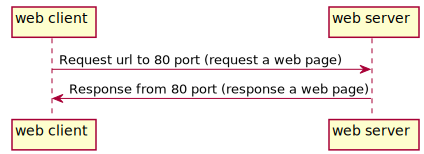

In [13]:
%%plantuml

@startuml
"web client" -> "web server":Request url to 80 port (request a web page)
"web server" -> "web client":Response from 80 port (response a web page)
@enduml

## 1.3 웹 데이터 수집

### 1.3.1 웹 데이터의 특성

'웹데이터'는 웹에서 수집한 데이터이다. 보통 데이터와 구별할 수 있는 특징이 있다.
* 웹데이터는 **http통신으로 교환되는 데이터**를 말한다. 따라서 모두 문자이다. 정량데이터도 예외가 아니다.
따라서 웹에서 읽은 수를 합계, 평균을 **계산하려면 문자에서 숫자형식으로 변환**하는 것이 필요하다.
* 서버측에서 반환하는 데이터는 **html**, **xml** 또는 **json** 형식을 가진다. 분석하기 위해, **파싱, 추출** 작업이 뒤 따라야 한다.

### 1.3.2 수집

웹에서 데이터를 수집하는 것을 '크롤링' 또는 '스크레이핑'이라고 한다.
* **웹크롤링**은 웹페이지 주소 및 사이트와 관련한 정보를 수집하는 것을 말한다. 구글과 같은 검색엔진이 사전에 웹사이트를 이곳 저곳 다니면서 정보를 수집하고 **인덱스**를 만들어 놓는 것이다. 사용자가 검색어를 입력하면 사전에 인덱싱된 정보를 검색하기 때문에, 속도가 빨라지게 된다.
* **웹스크레이핑**은 웹사이트에서 정보를 추출하는 것을 말한다. 웹크롤링을 한 후 스크레이핑이 뒤 따르기도 한다.
* **웹파싱**은 트리와 같은 구조로 만들어 원하는 데이터를 추출하기 편리하게 한다.

구분 | 초점 | 설명
-----|-----|-----
웹 크롤링 | 방문하고 인덱싱 | 검색엔진에서 검색을 빠르게 하기 위해, 사전에 웹주소를 방문하고 인덱싱
웹 스크레이핑 | 정보 추출 | 웹사이트에서 필요한 데이터 항목을 추출
웹 파싱 | 자료구조로 변환 | 웹사이트를 분석가능한 자료구조로 변환

* 가져오는 방식은 api를 제공하는지에 따라 구분할 수 있다. api를 제공하지 않는 경우로 좁혀서 스크레이핑이라고 한다.

방식 | 설명
-----|-----
웹스크레이핑 | api를 제공하지 않는 경우, 프로그램을 작성해서 웹데이터, 대개의 경우 html 페이지를 가져온다.
api | api를 사용하여 가져온다. 데이터를 대상으로 하며 xml, json 형식이 많이 사용된다.

### 1.3.3 프로그래밍으로 수집

#### 사람이 하는 수집

우리가 웹에서 자료를 가져오는 또는 스크레이핑하는 경우에는 다음 작업을 반복하게 된다.
* 자신의 컴퓨터에서 웹브라우저 (웹클라이언트)를 실행한다.
* 웹브라우저의 주소창에 웹주소를 입력하고,
* 결과가 웹브라우저에 뜨면, 원하는 데이터를 읽거나, 필요한 부분은 복사해서 저장한다.
* 더 필요한 정보가 있으면 이런 절차를 반복한다.


#### 프로그램으로 하는 수집

웹페이지에서 필요한 정보를 추출하는 스크레이핑을 프로그램으로 만들어 보자.
프로그램은 컴퓨터가 실행하니까 대량 데이터를 반복으로 실행하는 노력을 덜어줄 것이다. 실제 스크레이핑을 컴퓨터가 아니라 사람이 한다면 효율이 매우 떨어지게 된다.

단계 | 설명
-------|-------
url | 데이터를 가져올 **도메인**을 정한다. **params**까지 정해서 주소창에 연습해 본다.
웹서버에 요청 | url의 요청방식 **GET**, **header**를 정의한다. http를 통해 서버에 요청(Request)하여 웹페이지를 반환(Response) 받게 된다.
웹서버 처리결과 받기 | Response는 **version, response code, body** 등을 가진다.
데이터항목 추출 | Response에서 가져온 결과를 **tree**로 만들어 추출한다 (parser). 대개 **html, xml, json** 형식을 가진다.
저장 | csv, Sql, NoSql을 사용한다.
반복하기 | 다음 페이지를 연속해서 가져올 경우, 다음 requests는 어떻게 정의할지 정의한다.

위 절차는 데이터 수집을 위해 수행된다. 뒤 따르는 데이터 분석을 위해서는 추가 작업이 필요하다. 
데이터를 분석하려면 인터넷에서 정보를 가져와서, 데이터 분석에 필요한 형식으로 변환하는 작업이다.
데이터를 분석가능한 형식으로 정리해야 한다. 보통 행과 열로 정리한다. 그 후 비로서 통계 또는 머신러닝을 사용하여 분석이 시작된다. 여기서는 데이터수집을 데이터분석은 다음에 배워나갈 것이다.


### 1.3.4 웹페이지 주소

#### URL
 
URL은 **웹페이지 주소**이다. URL은 **자원을 찾을 수 있는 방법을 포함**하고 있고 URI 주소 방식에 따라 정해진다.

> URI는 Uniform Resource Identifier의 줄임말이고, 어떤 자원에 대한 명칭이다. URI는 URN, URL을 모두 포함한다.
> * '사람'의 예를 들어 보면, **'이름'은 URN** (Uniform Resource Name)이다.
그 사람이 **거주하는 '주소'는 찾아가는 방법을 포함하고 있으므로 URL** (Uniform Resource Locator)이다.
> * **파이썬 주소 http://www.python.org/index.html는 URL**이다. 맨 앞에 찾아가는 방법, 즉 http를 가지고 있기 때문이다. **http를 제외한 www.python.org/index.html은 URN**이다.


#### URL의 형식

인터넷주소 url의 형식은 다음과 같이 구성한다.

```
scheme:[//[user:password@]host[:port]][/]path[?query][#fragment]
```

구분 | 설명
-----|-----
scheme | 찾아가는 방법을 의미한다. 인터넷 주소는 http 방식을 사용한다. 예: http://www.smu.ac.kr
사용자인증 | 인터넷주소는 개방되어 있기 때문에 보통 안 적는다.
도메인 네임 | 영어로 된 도메인네임(www.smu.ac.kr)은 사람이, 컴퓨터는 숫자로 된 ip 주소. DNS에서 도메인네임을 ip주소로 변환한다.
param | 도메인에 전송되는 명령어 역할을 하는 params에서 설명

#### 자신의 컴퓨터에 있는 파일의 URI

자신의 컴퓨터에 있는 파일을 읽어오는 URI를 작성한다. 물론 웹브라우저가 읽을 수 있는 형식만 가능하다. 맨 앞 scheme이 http에서 file로 변경된다.
```
file://host/path/to/html
```

웹브라우저를 열고, 주소창에 '로컬파일 주소'를 형식에 맞추어 입력한다.
* 'localhost'는 자신의 컴퓨터 명칭 'hostname'이다. 그 IP주소는 127.0.0.1이다.
* 로컬파일을 부를 경우 'localhost'는 생략할 수 있다.
* **웹브라우저 주소창에 `file:///` 이라고 입력하면 로컬파일을 검색**하여 선택할 수 있다.
```
file://localhost/home/jsl/Code/src/mypage1.html
file:///home/jsl/Code/src/mypage1.html (리눅스에서 사용하는 형식)
file:///c:/Code/src/mypage1.html (윈도우에서 사용하는 형식)
```


In [18]:
%%writefile src/mypage1.html
<!DOCTYPE html>
<html>
<head>
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>

Overwriting src/mypage1.html


Python webbrowser는 웹페이지를 읽을 수 있는 라이브러리이다. webbrowser에서 읽는 경우, **시간**이 좀 걸린다 (몇 초 정도).
운영체제 라이브러리 os를 사용하면 **윈도우, 리눅스 교차 실행의 오류**를 막을 수 있다. 교차실행오류는 디렉토리 구분자가 윈도우, 리눅스 간에 서로 다르기 때문에 발생한다.
* os.path.join()을 사용하여 **운영체제에 따라 디렉토리 구분자가 서로 다른 오류**를 막아준다.
* os.path.join()은 현재 작업디렉토리 'os.getcwd()' + 'src' + 'mypage1.html'을 합쳐 준다.

운영체제 | 디렉토리 구분자
-----|-----
윈도우 | ```\```
리눅스 | ```/```

In [1]:
import webbrowser
import os

myuri='file://'+'localhost'+os.path.join(os.getcwd(), 'src','mypage1.html')
#print myuri
webbrowser.open(myuri)

True

* 인터넷에서는 'UTF-8'을 사용한다. https://www.w3.org/International/questions/qa-choosing-encodings
* 한글을 깨지지 않게 하려면, **meta charset을 utf-8**로 지정한다.

In [2]:
%%writefile src/mypage2.html
<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>

Overwriting src/mypage2.html


In [4]:
webbrowser.open(myuri)

True

* ipython notebook에서 html을 표현한다.
    * 셀에 내용을 입력하고 '%%html' 명령어를 사용한다.

In [3]:
%%HTML
<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>

#### 원격 URL

원격 구글지도에 접속해 보자. 특정 위치를 지정할 경우 URL에 어떤 변화가 있는지 보자.
* 구글지도에 접속해서, 검색창에 'jongro gu hongji dong' 문자열을 입력한다.
* 그리고 주소창의 domain과 그 뒤에 붙는 검색어를 보면 '/maps/place/'에 주소가 **'+'로 연결**되어 있다.

이 URL을 Python 프로그램에서 직접 열려면 webbrowser를 사용하면 된다.

In [32]:
#브라우저에서 지도 열기
import webbrowser
myurl='https://www.google.co.kr/maps/place/Hongji-dong,+Jongno-gu,+Seoul/'
webbrowser.open(myurl)

True

### 1.3.5 params

* **query string**은 URL의 일부로서 다음과 같이 뒤에 붙인다.
```
http://example.com/over/there?name=ferret
```
* **web form**을 사용할 경우 query string
    * field와 값을 한 쌍으로 구성, **field=value**
    * 구분자는 **&** (또는 세미콜론 ;)
```
field1=value1&field2=value2&field3=value3...
```

* 위 지도를 열 경우와 같이, 검색어를 '+'로 붙여 쓰기도 한다.

In [9]:
import urllib
params = urllib.urlencode({"a":4,"b":20,"c":2016,"d":6,"e":30,"f":2016,"s":"^KS11"})
print params

a=4&c=2016&b=20&e=30&d=6&f=2016&s=%5EKS11


* URL 인코딩
    * URL을 전송할 경우, ASCII 모든 문자를 사용할 수 없다.
        * 인코딩이 필요 없는 문자
```
A-Z a-z 0-9 - _ . ~
```

        * 인코딩이 필요한 문자
```
! * ' ( ) ; : @ & = + $ , / ? % # [ ]
```
    * 이럴 경우 **퍼센트 인코딩**로 변환해서 전송한다. **'%xx'**, 즉'%'와 그 뒤 16진수로 문자로 부호화 한다.
    * 변환기를 사용해서 확인할 수 있다. https://www.url-encode-decode.com/

문자 | URL 인코딩
-----|------
공백 | %20 (또는 '+')
! | %21
" | %22
'# | %23
% | %25
tilde(~) | %7E

* 예를 들어 구글검색 params에 특수문자가 포함될 수 있다.
    * python을 검색하는 경우
```
https://www.google.co.kr/#q=python
https://www.google.co.kr/search?q=python
```

    * 'python tutorial'을 검색할 경우
```
https://www.google.co.kr/#q=python+tutorial
```

* urllib이 변환기능을 제공하므로, 사용하면 편리하다. urlencode(), quote(), quote_plus()함수가 지원된다.
    * 위 표에서 보듯이 **#, 공백, % 등의 문자가 퍼센트인코딩으로 전환**되었다.

In [1]:
import urllib
params = urllib.urlencode({"#q": "python tutorial"})
print params

%23q=python+tutorial


In [2]:
params = urllib.urlencode({"#q": "% modulo"})
print params

%23q=%25+modulo


In [3]:
print urllib.urlencode({'#q':'한글'})
print urllib.urlencode({'#q':u'한글'.encode('utf-8')})

%23q=%ED%95%9C%EA%B8%80
%23q=%ED%95%9C%EA%B8%80


In [17]:
print urllib.quote(' ')
print urllib.quote_plus(' ')

%20
+


## 1.4 url 가져오기

url을 가서 웹페이지를 가져오는 작업을 해보자. 
이 작업에서는 앞서 설명했듯이 Request를 보내고, Response를 받게 된다.

### 1.4.1 library

많이 쓰이는 라이브러리는 request와 urllib이 있다.

* **requests** - web page가져오거나, API를 사용할 때. 아래는 서로 같은 기능을 한다.
```
urllib2.urlopen(url).read()
requests.get(url).text
```

* **urllib** - handles opening and reading URLs
    * Python 3.x에서 urllib를 개정해서 1) urllib.request, 2) urllib.parse, 3) urllib.error로 나눔.
    * 제공하는 기능이 서로 차이가 있어, urllib과 urllib2를 같이 사용하기도 한다.

구분 | 차이
-----|-----
urllib | GET query를 생성하기 위한 urlencode()를 사용할 수 있다.
urllib2 | 'Request'를 사용할 수 있다.

* httplib - handles http requests, urllib내부에서 사용하고 있슴.
* curl - Terminal에서 사용하는 명령어

### 1.4.2 Requests

웹페이지를 가져오는 라이브러리로서, urllib과 더불어 많이 쓰인다.
우리를 대신하여 url을 방문하고, 페이지를 가져온다.


In [4]:
import requests
r = requests.get('http://python.org/')
_html = r.text
print len(_html)

48872


* r.text로 받아온 **페이지는 유니코드 문자열**이다.
* 웹페이지는 html 문자열, 즉 string, unicode이다.
    * 문자열이므로, **html태그 역시 파싱을 하기 전에는 문자일 뿐**이다.

In [5]:
print r.encoding
print type(_html)

utf-8
<type 'unicode'>


* response의 정보를 읽을 수 있다. 앞서 보낸 request의 응답결과를 가지고 있다.

In [5]:
print r.headers

{'Content-Length': '48761', 'x-xss-protection': '1; mode=block', 'Age': '2465', 'X-Cache': 'HIT', 'Accept-Ranges': 'bytes', 'X-Timer': 'S1505530232.355749,VS0,VE0', 'Vary': 'Cookie', 'X-Served-By': 'cache-nrt6135-NRT', 'Server': 'nginx', 'Connection': 'keep-alive', 'Via': '1.1 varnish', 'X-Cache-Hits': '16', 'Strict-Transport-Security': 'max-age=63072000; includeSubDomains', 'Date': 'Sat, 16 Sep 2017 02:50:32 GMT', 'X-Frame-Options': 'SAMEORIGIN', 'Content-Type': 'text/html; charset=utf-8', 'X-Clacks-Overhead': 'GNU Terry Pratchett'}


### 1.4.3 urllib

* urllib2에서 페이지 가져오는 함수 urlopen()
* 사용하고 close() 한다.
* 두 라이브러리가 읽어온 문자열 길이는 같아야 하지만, 다소간의 차이가 있을 수 있다.
* 길이는 48k이다.

In [4]:
import urllib2
u = urllib2.urlopen("https://www.python.org/")
html=u.read()
u.close()
print len(html)

48761


* urllib2 라이브러리는 Request를 사용할 수 있다.
* response의 결과 html을 500자만 읽어서 확인했다.

In [7]:
import urllib2
url = 'http://www.python.org'
response = urllib2.urlopen(url)
html = response.read()
print html[:500]

<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqu


In [15]:
print response.headers

Server: nginx
Content-Type: text/html; charset=utf-8
X-Frame-Options: SAMEORIGIN
x-xss-protection: 1; mode=block
X-Clacks-Overhead: GNU Terry Pratchett
Content-Length: 48761
Accept-Ranges: bytes
Date: Sat, 16 Sep 2017 03:02:59 GMT
Via: 1.1 varnish
Age: 3212
Connection: close
X-Served-By: cache-nrt6134-NRT
X-Cache: HIT
X-Cache-Hits: 28
X-Timer: S1505530980.759859,VS0,VE0
Vary: Cookie
Strict-Transport-Security: max-age=63072000; includeSubDomains



### 1.4.4 HTTP errors

* error.code (참조 https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)

코드 | 구분 | 예
-----|-----|-----
1xx | Informational | 
2xx | Success | 200 OK, 201 Created, 202 Accepted
3xx | Redirection | 
4xx | 클라이언트 오류 | 400 Bad Request, 404 Not Found
5xx | 서버 오류 | 500 Internal Server Error

* 오류의 처리
    * 오류는 처리시간을 넘기거나, 연결이 안되는 경우 등이 있다.
    * 오류가 발생하였는지 try, except문으로 처리할 수 있다.
    * html에 저장된 내용이 없는 경우 'None'으로 확인할 수 있다.


존재하지 않는 페이지를 가져오려고 하면, 당연히 오류가 발생한다. 404는 잘못된 요청에 대한 코드이다.

In [2]:
import requests
r = requests.get('http://python.org/dog.html')
print r.status_code

404


* urllib2.HTTPError 또는 urllib2.URLError

In [27]:
req = urllib2.Request('http://www.python.org/dog.html')

try:
    response=urllib2.urlopen(req)
except urllib2.HTTPError, e:
    print e.code, e.reason

404 OK


In [28]:
if html is None:
    print("URL is not found")
else:
    print "html has something!"

html has something!


## 문제 웹데이터-1: python.org 페이지 가져오기

### 문제
python.org 사이트 웹페이지를 읽어서 길이와 최신뉴스 1건을 읽기

### 해결
Python requests 라이브러리를 사용해서 가져온다. 가져온 웹페이지는 파싱을 하기 전에는 단순한 문자열에 불과하다. 문자열은 문자의 배열구조이다. 문자열에서 찾는 문자를 검색하여 그 위치를 알 수 있다. 이런 방식으로 문자를 읽는 것은 매우 불편하다. 파싱을 해서 편리하게 원하는 데이터 항목을 추출할 수 있다.

In [1]:
import requests
r = requests.get(u'http://python.org/')

In [2]:
page=r.text

In [3]:
print len(page)

48872


* Lastest News 1건을 출력하려면, 웹페이지를 '소스 보기'하면서 패턴을 찾는다. 인덱스를 사용하기 때문에, 문자의 위치가 변경되면 올바른 출력이 이루어지지 못하게 된다.
* 검색하는 문자열이 포함되는 'beg', 'end'를 찾는다.

In [4]:
beg=page.find("Latest News")

In [5]:
end=page.find("</a></li>",beg)

In [7]:
print beg,end

27809 28400


In [6]:
print page[beg:end]

Latest News</h2>
                            <p class="give-me-more"><a href="http://blog.python.org" title="More News">More</a></p>
                            
                            <ul class="menu">
                                
                                
                                <li>
<time datetime="2018-03-14T04:46:00.000002+00:00"><span class="say-no-more">2018-</span>03-14</time>
 <a href="http://feedproxy.google.com/~r/PythonInsider/~3/r2t6CLt4uWQ/python-365rc1-is-now-available-for.html">Python 3.6.5rc1 is the first release candidate for Python 3.6.5, ...


프로그램을 파일로 만들어 완성한다.
파일로 만들면 명령창에서 실행할 수 있고, 작업을 자동화할 수 있다.

줄| 설명
-----|-----
3 | readPythonOrg()함수를 정의한다. 앞서 테스트했던 코드를 정리해서 넣었다.
17 | 3줄 readPythonOrg()을 호출
19 | main함수가 시작한다. 보통은 들여쓰기 되어 있지 않은 모든 명령문을 실행한다. **명령창에서 실행하는 경우 (즉 `$ python ds2_1_readPythonOrg.py` 라고 실행), `__name__`변수를 `__main__`으로 설정**하게 된다. 다른 모듈에서 호출할 경우에는 그렇게 하지 않는다.
20 | main()을 호출

In [ ]:
# %load src/ds2_1_readPythonOrg.py
#!

import requests

def readPythonOrg():
    try:
        r = requests.get(u'http://python.org/')
        r.raise_for_status()
    except requests.exceptions.HTTPError as e:
        print e
        sys.exit(1)
    page=r.text
    print "length: ",len(page)
    beg=page.find("Latest News")
    end=page.find("</a></li>",beg)
    print page[beg:end]

def main():
    readPythonOrg()

if __name__=="__main__":
    main()



## 1.5 http headers

http 헤더는 http 통신에서 매우 중요하다. 아래 http Requests, Responses가 예시되어 있다.
첫줄을 제외하고 다음 줄부터 끝까지 헤더라고 한다.

### 1.5.1 HTTP Request(s)

* http Requests의 예시이다. **2째 줄부터는 헤더**정보를 가지고 있다.

줄 번호 | 설명
-----|-----
1 | GET 함수를 사용하는 것을 나타낸다.
2 | User-Agent를 확인할 수 있다.
4 |  html, json과 같은 내용 형식을 지정한다.

```html
GET HTTP/1.1
User-Agent: Mozilla/5.0 (compatible; MSIE 9.0; Windows NT)
Host: http://www.example.com
Accept: text/html, application/xhtml+xml, */*
Accept-Language: en-us
Accept-Encoding: gzip, deflate
Connection: Keep-Alive
```

### 1.5.2 HTTP Response(s)

* http Resposes의 예시이다. **2째 줄부터는 헤더**정보를 가지고 있다.

줄 번호 | 설명
-----|-----
6 | 서버가 돌려주는 파일 형식을 지정한다.
8 ~ 끝 | html 첨부

```
HTTP/1.1 200 OK
Date: Fri, 10 Mar 2017 11:00:00 GMT
Server: Apache/2.2.14 (Win32)
Last-Modified: Fri, 10 Mar 2017 12:00:00 GMT
Content-Length: 88
Content-Type: text/html
Connection: Closed
<html>
<body>
<h1>It works!</h1>
</body>
</html>
```

### 1.5.3 user agent

* 웹페이지를 요청하면 user agent를 같이 넘겨준다. Requests 헤더의 2째 줄을 잘 살펴보자.
* http에서 웹서버가 user agent의 params를 참조하여 클라이언트 브라우저에 적합한 내용을 전송한다.
* 'robots.txt' 문서에 크롤링을 제한하는 user agent의 headers정보를 명시한다.
    * Python에서 사용하는 기본 User Agent 방식은 '**Python library/Version**'
    * urllib 1.17을 사용하면 'Python-urllib/1.17'
    * 이런 User Agent를 사용하면 에러가 발생할 수 있다. 헤더를 보고 Python 프로그램으로 크롤링한다고 판단해 거절.

* 현재 사용하고 있는 컴퓨터의 웹브라우저에서 검색하는 경우, user agent 확인
http://httpbin.org/user-agent

* 형식
```
Mozilla/[version] ([system and browser information]) [platform] ([platform details]) [extensions]
```

구분 | 설명
-----|-----
Mozilla/[version] | Mozilla/5.0, Mozilla 5.0 호환
[system and browser information] | (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us)
platform | AppleWebKit/531.21.10, 브라우저 플랫폼
platform details | (KHTML, like Gecko)
extensions | Mobile/7B405, 브라우저 확장

* 예

브라우저 예 | User Agent
-----|-----
iPad Safari | Mozilla/5.0 (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Mobile/7B40
리눅스 Firefox | Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:42.0) Gecko/20100101 Firefox/42.0
맥 Safari | Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/601.2.7 (KHTML, like Gecko) Version/9.0.1 Safari/601.2.7

#### urllib을 사용하는 headers 설정

* urllib.Request에 header를 설정할 수 있다.

In [ ]:
import urllib2

request_headers = {
"User-Agent": "Mozilla/5.0 (compatible; MSIE 9.0; Windows)",
"Accept": "text/html,application/xhtml+xml, */*",
"Accept-Language": "en-US",
"Connection": "keep-alive" 
}

request = urllib2.Request("http://www.example.com", headers=request_headers)
response = urllib2.urlopen(request)
html = response.read()
print html[:100]

## 문제 웹데이터-2: 프로그램 로봇이지만 웹브라우저에서 검색하는 것으로 만들기

### 문제

Python과 같은 프로그램에서 검색을 하게 되면 이른바 '로봇' 또는 데이터 크롤러라고 한다. 이러한 '로봇'은 사이트에 부하를 주기 때문에 반기지 않는다. 사이트에는 'robots.txt'를 게시해 사전에 이러한 '로봇'의 크롤링 또는 스크레이핑을 허용하지 않고 있다. 이럴 경우 정상적인 웹브라우저에서 요청하는 것과 같이 페이지를 읽을 수 있을까? Python 프로그램으로 검색을 하는 것은 허용되지 않는다.

### 해결

Python은 'Python-urllib/1.17'를 헤더에 설정한다. 이런 설정이 '로봇'으로 인식하게 한다. 헤더의 **user-agent를 웹브라우저와 동일하게 설정**해서 보내면 된다.

### 로봇의 user-agent를 설정하지 않고 구글 검색은 할 수 없다.

Python에서 크롤링을 할 경우의 기본 user-agent는 'Python-urllib/1.17'이다.

In [3]:
import urllib
urllib.URLopener.version

'Python-urllib/1.17'

* 검색어를 사용하는 경우, params를 구성해야 한다.
* 이 경우 url에 params가 붙은 검색어를 사용하여 request를 전송한다.

In [4]:
from urllib import urlopen
keyword='python'
resp = urlopen('https://www.google.com/search?q='+keyword)
html=resp.read()
len(html)

6130

* urllib을 사용해서 검색하면 오류가 발생한다. 즉 response에 'error'가 출력된다.
* 'Python-urllib/1.17' 헤더 정보를 가지고 구글을 검색하면 오류 403으로 금지된다.

In [6]:
print html.find('Error')
print html[100:200]

139
um-scale=1, width=device-width"><title>Error 403 (Forbidden)!!1</title><style>*{margin:0;padding:0}h


### 웹브라우저에서의 검색은 당연히 정상적으로 실행된다.

* 그러나 웹브라우저를 열어서 검색하면 오류가 발생하지 않고, 검색 결과를 반환한다.
즉 '로봇'은 허용되지 않지만 정상적인 웹브라우저는 사용할 수 있다는 의미이다.

In [ ]:
import webbrowser
webbrowser.open('http://www.google.com/search?q=python')

### urllib으로 user-agent 설정하기

* 구글 검색엔진에서 user agent를 (Python이 아니라) 웹브라우저로 설정해서 검색하기

In [9]:
import urllib2
url = 'http://www.google.com/#q=python'
headers = {'User-Agent' : 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:42.0) Gecko/20100101 Firefox/42.0'}
request = urllib2.Request(url, None, headers)
response = urllib2.urlopen(request)
print response.headers

Date: Sat, 16 Sep 2017 09:23:08 GMT
Expires: -1
Cache-Control: private, max-age=0
Content-Type: text/html; charset=UTF-8
X-Content-Security-Policy-Report-Only: default-src https: data:; options eval-script inline-script; report-uri /csp_report; referrer origin
P3P: CP="This is not a P3P policy! See https://www.google.com/support/accounts/answer/151657?hl=en for more info."
Server: gws
X-XSS-Protection: 1; mode=block
X-Frame-Options: SAMEORIGIN
Set-Cookie: NID=112=OHlq8drxdJRs_urAFt6EoJKiHR4B61JkfNnDAQragre757O9HdVrU2hNbuCqjz2itQiir8YA6FvImddSiuvOpr1HRsfZ1wUjkhvGA62Kru-tCR6wshoAfBCRS5FiLy8E; expires=Sun, 18-Mar-2018 09:23:08 GMT; path=/; domain=.google.co.kr; HttpOnly
Alt-Svc: quic=":443"; ma=2592000; v="39,38,37,35"
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close



In [10]:
html = response.read()
print len(html)

201667


* 검색 결과를 파일에 쓰고 확인한다.
* src/mygoogle.html을 열어본다. 브라우저 주소창에 'file:///'을 입력하면 로컬파일 탐색 기능이 실행된다.

In [11]:
import os
f=open(os.path.join('src','mygoogle.html'),'w')
f.write(html)
f.close()

* urllib의 FancyURLOpener를 사용해서 User Agent를 설정할 수 있다.
    * 리눅스 Firefox User Agent의 예를 사용해서 설정해 본다.
    
urlopen()은 FancyURLOpener 객체를 생성해서 사용한다.
FancyURLOpener를 생성해서 urllib._urlopener에 넣어주면 된다.


In [12]:
from urllib import FancyURLopener

class MyOpener(FancyURLopener):
    version = 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:42.0) Gecko/20100101 Firefox/42.0'
print MyOpener.version

Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:42.0) Gecko/20100101 Firefox/42.0


In [13]:
import urllib
urllib._urlopener=MyOpener()
u=urllib.urlopen('http://www.google.com/search?q=python')
html=u.read()

In [14]:
print len(html)

274729


### Requests로  user-agent 설정하기

In [1]:
import requests
url = 'http://www.google.com/'
query={'q':'python'}
headers = {'User-Agent' : 'Mozilla 5.0 (X11; Ubuntu; Linux x86_64; rv:42.0) Gecko/20100101 Firefox/42.0'}
r=requests.get(url,params=query,headers=headers)
page=r.content
print len(page)

201626


* 파일로 쓰고 확인한다. Python webbrowser는 웹페이지를 렌더링할 수 있다. url에서만 열 수 있으므로 파일 url 'file://' 을 사용한다.

In [5]:
import os
f=open(os.path.join('src','mygoogle2.html'),'w')
f.write(page)
f.close()

In [7]:
import webbrowser
mygoogle='file://'+'localhost'+os.path.join(os.getcwd(), 'src','mygoogle2.html')
print mygoogle

webbrowser.open(mygoogle)

file://localhost/home/jsl/Code/git/bb/jsl/pyds/src/mygoogle2.html


True

프로그램을 파일 '.py'로 만들어 완성한 후 자동화할 수 있다.

줄| 설명
-----|-----
5 | searchGoogle()함수를 정의한다. 앞서 테스트했던 코드를 정리해서 넣었다.
27 | 5줄 searchGoogle()을 호출
29 | main함수가 시작한다. **명령창에서 실행하는 경우 `__name__`변수를 `__main__`으로 설정**하게 된다.
30 | main()을 호출

In [ ]:
# %load src/ds2_2_searchGoogle.py
#!

import requests
import os
import webbrowser

def searchGoogle():
    url = 'http://www.google.com/'
    query={'q':'python'}
    headers = {'User-Agent' : 'Mozilla 5.0 (X11; Ubuntu; Linux x86_64; rv:42.0) Gecko/20100101 Firefox/42.0'}
    try:
	r=requests.get(url,params=query,headers=headers)
    except requests.exceptions.HTTPError as e:
        print e
        sys.exit(1)
    page=r.text
    print "length: ",len(page)
    # write page
    fileName=os.path.join(os.getcwd(),'mygoogle.html')
    f=open(fileName,'w')
    f.write(page)
    f.close()
    # open page
    mygoogle='file://'+'localhost'+fileName
    print "opening ",mygoogle
    #webbrowser.open(mygoogle)

def main():
    searchGoogle()

if __name__=="__main__":
    main()



## 문제 웹데이터-3: 포털사이트와 페이스북 사이트에서 데이터 수집이 가능한지 알아보기

포털사이트와 페이스북 사이트의 robots.txt를 출력한다.
* 사이트 주소의 robots.txt를 입력한다.
* 페이스북 http://www.facebook.com/robots.txt 

## 문제 웹데이터-4: 로그인이 필요한 페이지를 가져오기

로그인이 필요한 웹 페이지를 가져오는 경우에는 계정, 비밀번호 인증이 필요하다.
* requests.auth.HTTPBasicAuth를 사용하거나
* 다음에 배우는 Selenium을 사용하면 된다.

## 문제 웹데이터-5: 크롤링을 해 놓은 오픈 데이터를 사용해 보기

[Common Crawl](http://commoncrawl.org/) 비영리기관으로 데이터를 크롤링해서 개방하고 있다.
구글에서 빠른 검색을 위해 웹을 사전에 크롤링하고 인덱싱하는 작업과 비교할 수 있다.
WARC, Web ARChive 파일 형식을 만들어 사용한다.
Python 라이브러리를 설치하여 사용할 수 있다.
```
pip install warc
```